In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [68]:
import pandas as pd

# Specify the local file path for the dataset
file_path = "Boston_House_Prices.csv"

# The dataset does not come with headers, so we specify them explicitly
column_names = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "Price"]

# Load the dataset into a pandas dataframe
dataset = pd.read_csv(file_path, header=None, delimiter=r"\s+", names=column_names)

# Display the first few rows to check the data
display(dataset.head())


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


1. Title: Boston Housing Data

2. Sources:
   (a) Origin:  This dataset was taken from the StatLib library which is
                maintained at Carnegie Mellon University.
   (b) Creator:  Harrison, D. and Rubinfeld, D.L. 'Hedonic prices and the 
                 demand for clean air', J. Environ. Economics & Management,
                 vol.5, 81-102, 1978.
   (c) Date: July 7, 1993

3. Past Usage:
   -   Used in Belsley, Kuh & Welsch, 'Regression diagnostics ...', Wiley, 
       1980.   N.B. Various transformations are used in the table on
       pages 244-261.
    -  Quinlan,R. (1993). Combining Instance-Based and Model-Based Learning.
       In Proceedings on the Tenth International Conference of Machine 
       Learning, 236-243, University of Massachusetts, Amherst. Morgan
       Kaufmann.

4. Relevant Information:

   Concerns housing values in suburbs of Boston.

5. Number of Instances: 506

6. Number of Attributes: 13 continuous attributes (including "class"
                         attribute "MEDV"), 1 binary-valued attribute.

7. Attribute Information:

    1. CRIM      per capita crime rate by town
    2. ZN        proportion of residential land zoned for lots over 
                 25,000 sq.ft.
    3. INDUS     proportion of non-retail business acres per town
    4. CHAS      Charles River dummy variable (= 1 if tract bounds 
                 river; 0 otherwise)
    5. NOX       nitric oxides concentration (parts per 10 million)
    6. RM        average number of rooms per dwelling
    7. AGE       proportion of owner-occupied units built prior to 1940
    8. DIS       weighted distances to five Boston employment centres
    9. RAD       index of accessibility to radial highways
    10. TAX      full-value property-tax rate per $10,000
    11. PTRATIO  pupil-teacher ratio by town
    12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks 
                 by town
    13. LSTAT    % lower status of the population
    14. MEDV     Median value of owner-occupied homes in $1000's

8. Missing Attribute Values:  None.

In [69]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [70]:
# summary statistics
dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [71]:
# check the missing values
dataset.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

<Axes: >

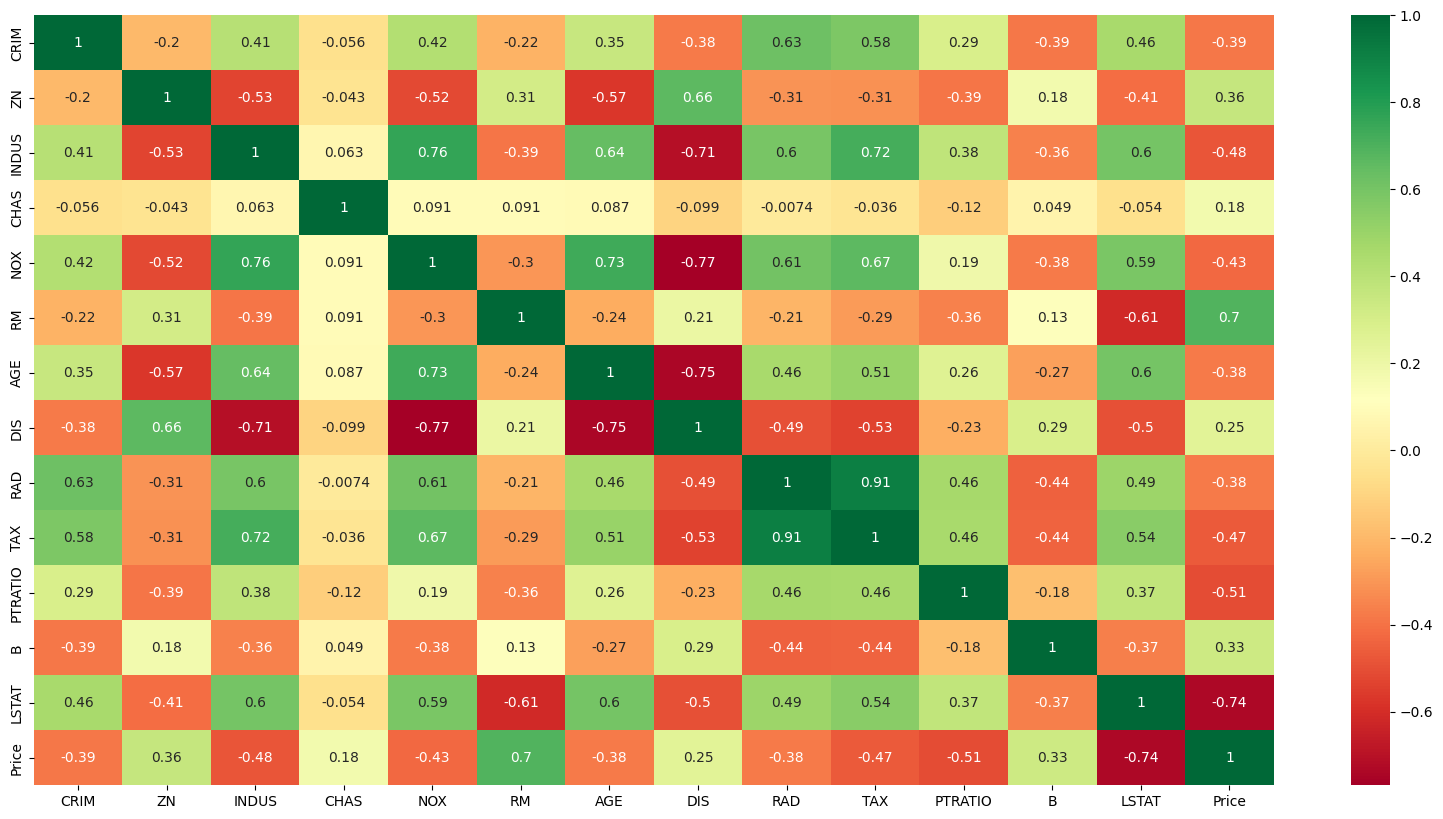

In [72]:
#exploratory data analysis
#corelation matrix
dataset.corr()
#visualize the corelation matrix with bigger figure size
# with green color for positive corelation and red color for negative corelation
import seaborn as sns
plt.figure(figsize=(20,10))
sns.heatmap(dataset.corr(),annot=True,cmap='RdYlGn')


<Axes: >

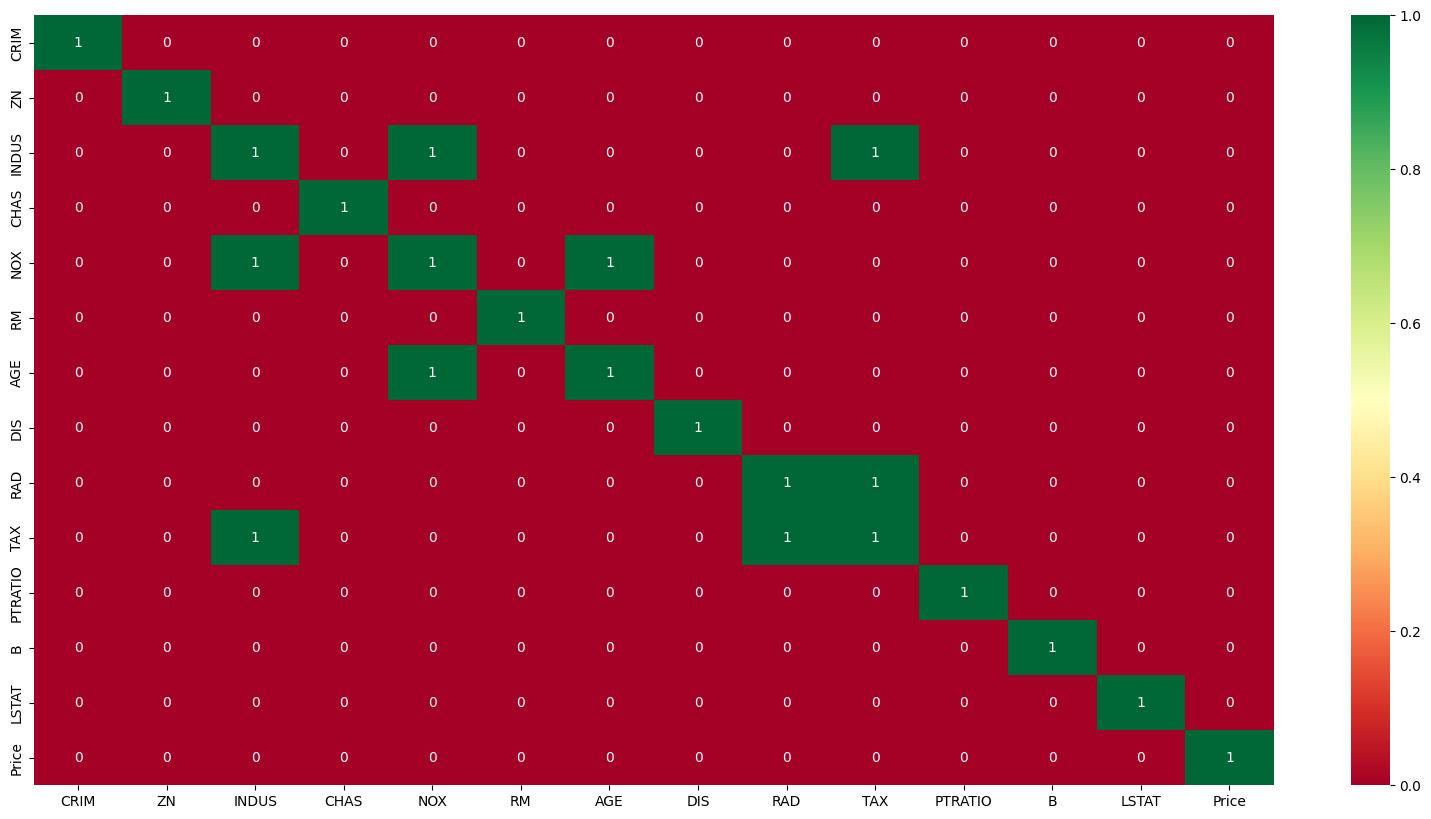

In [73]:
# heatmap for multi-colinearity between the features
plt.figure(figsize=(20,10))
sns.heatmap(dataset.corr()>0.7,annot=True,cmap='RdYlGn')


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


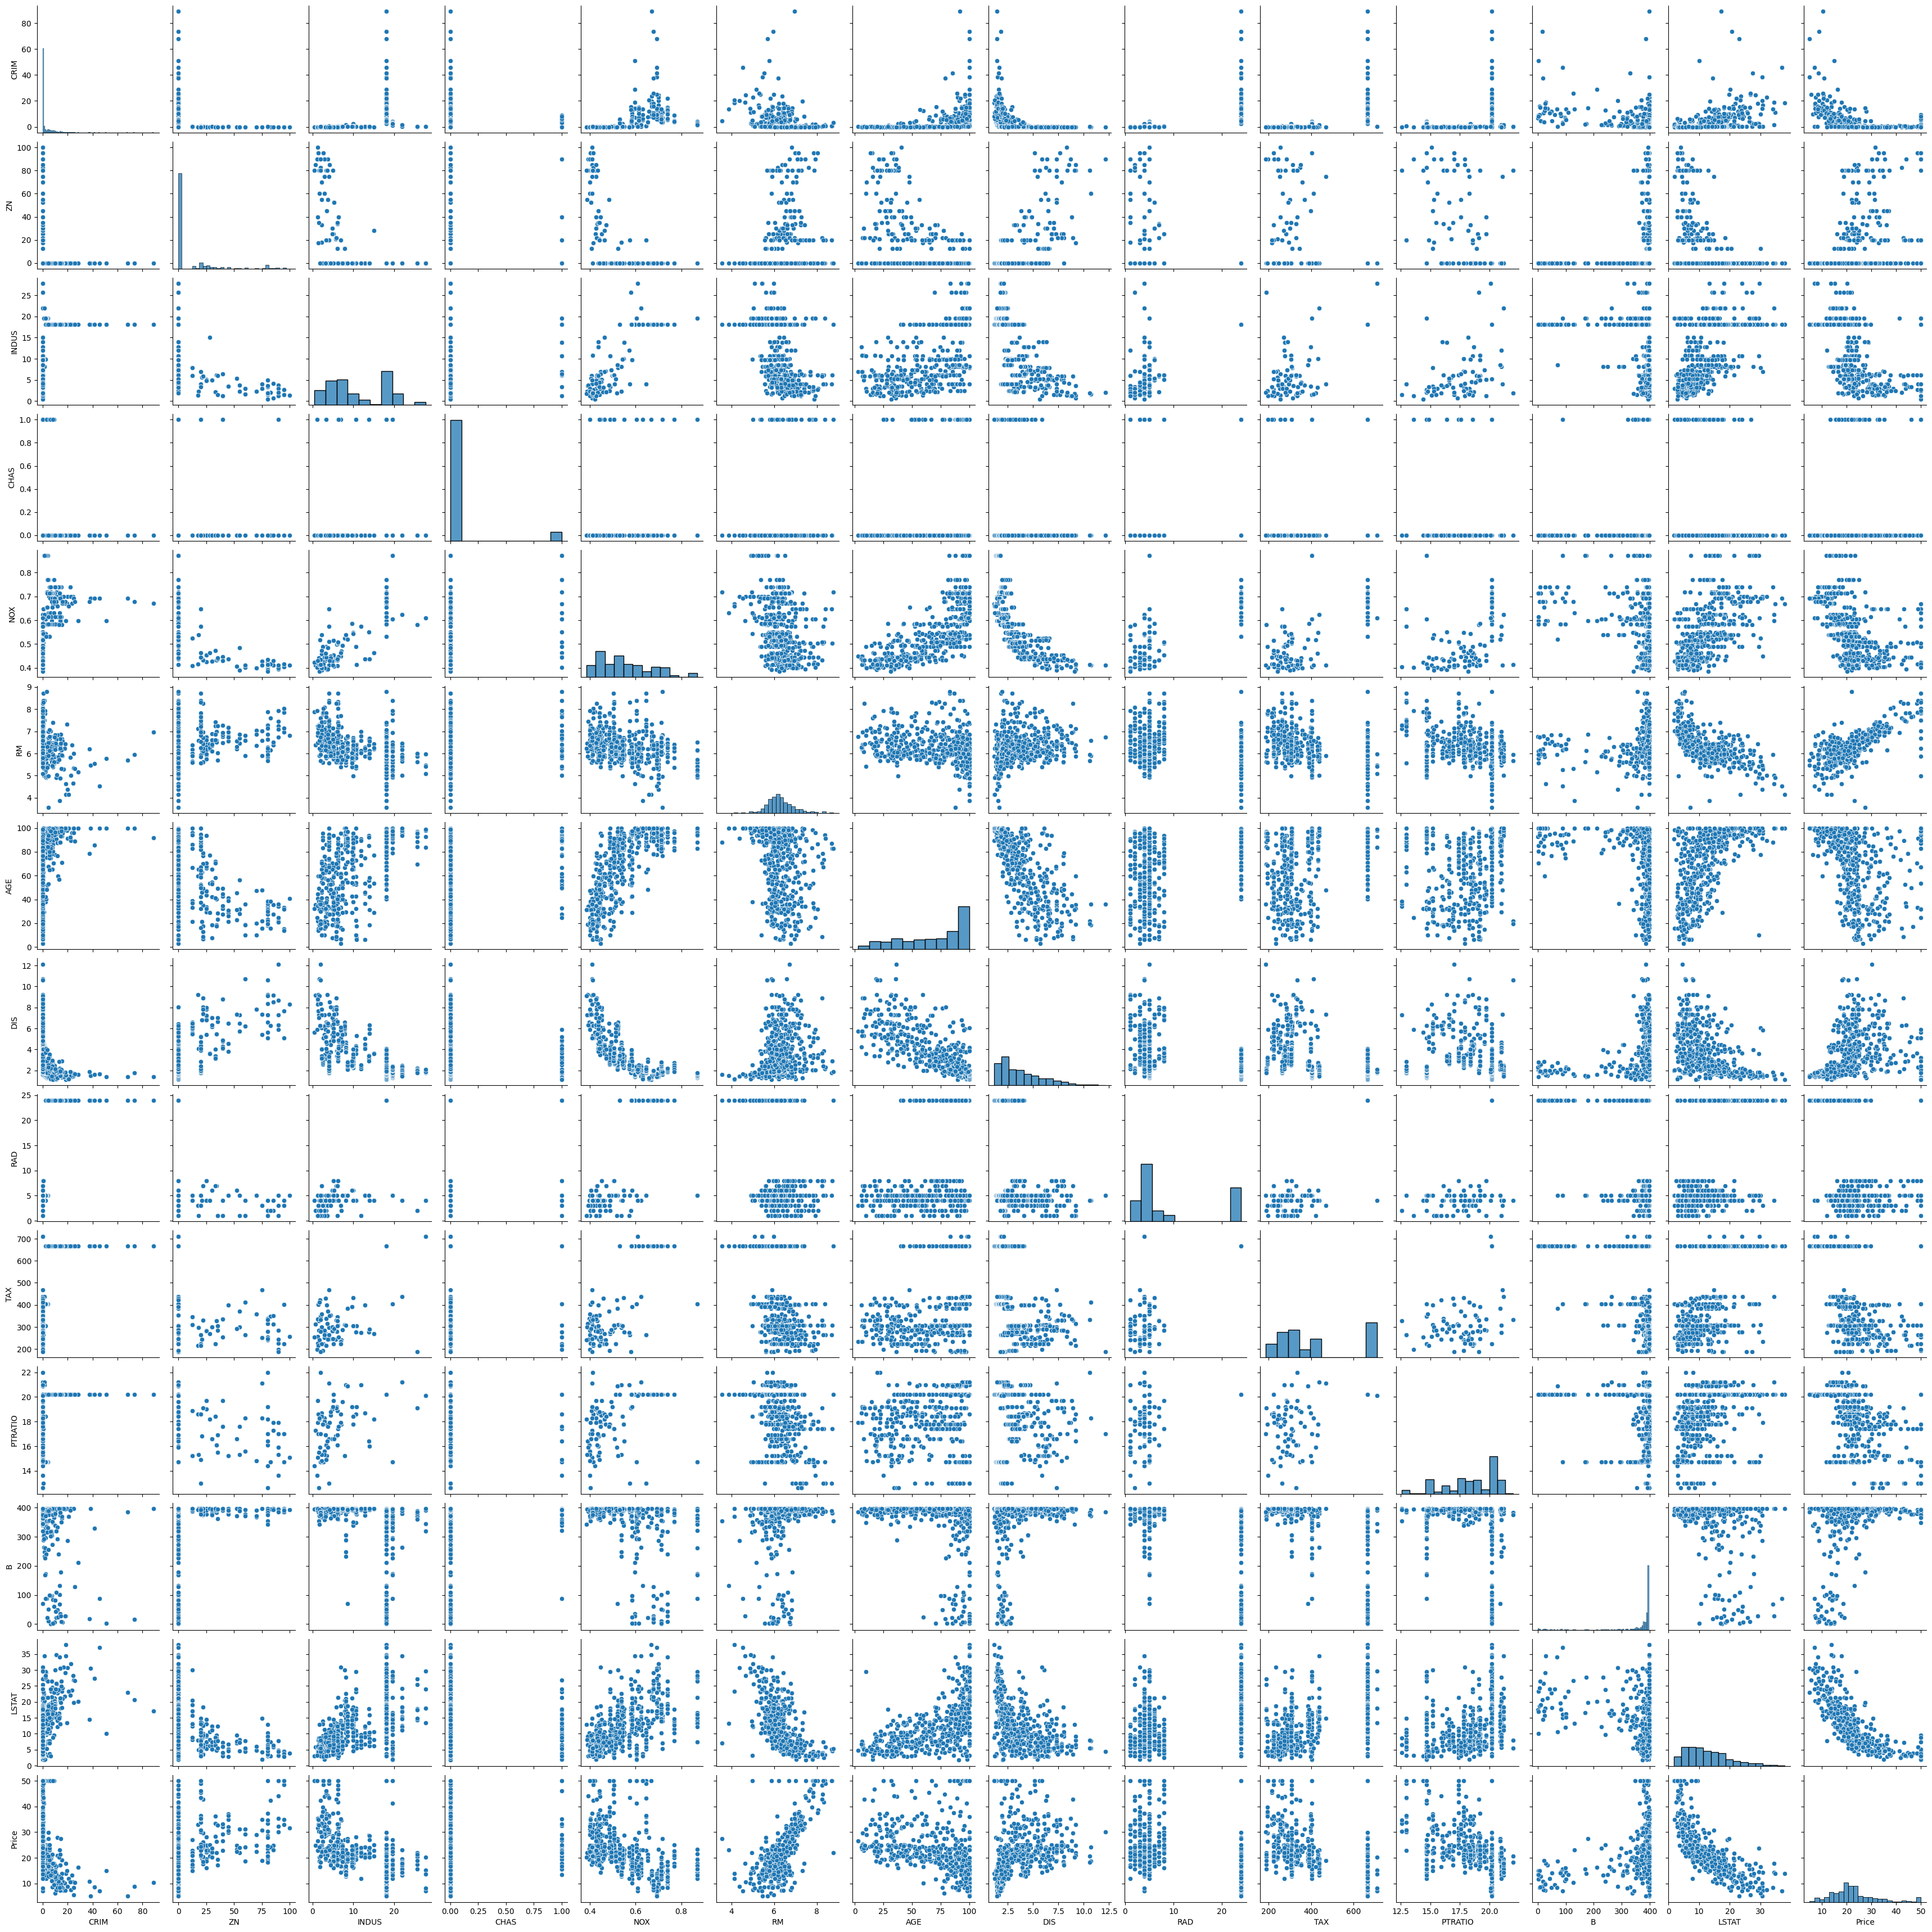

In [74]:
# scatter plot for the features with high corelation
sns.pairplot(dataset)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


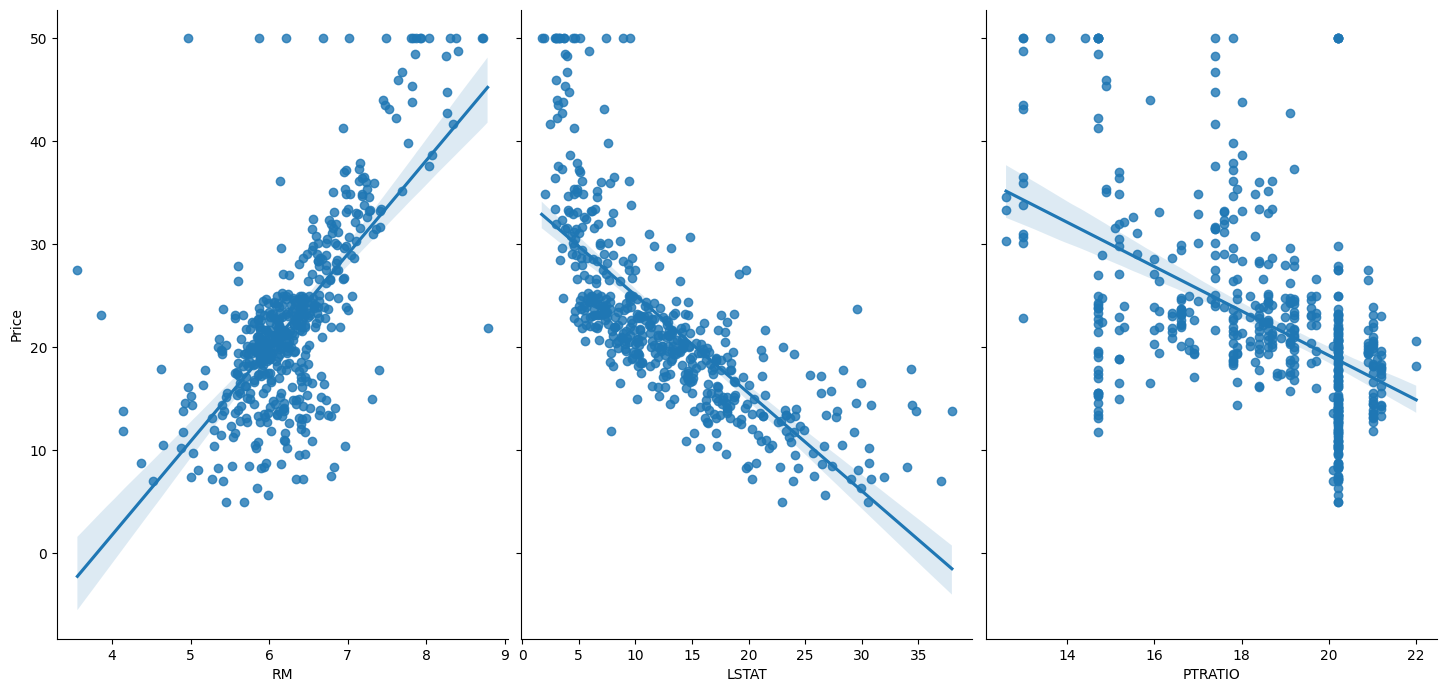

In [75]:
#scatter plot for the features with high corelation
sns.pairplot(dataset,x_vars=['RM','LSTAT','PTRATIO'],y_vars='Price',size=7,aspect=0.7,kind='reg')

# Data Analysis

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


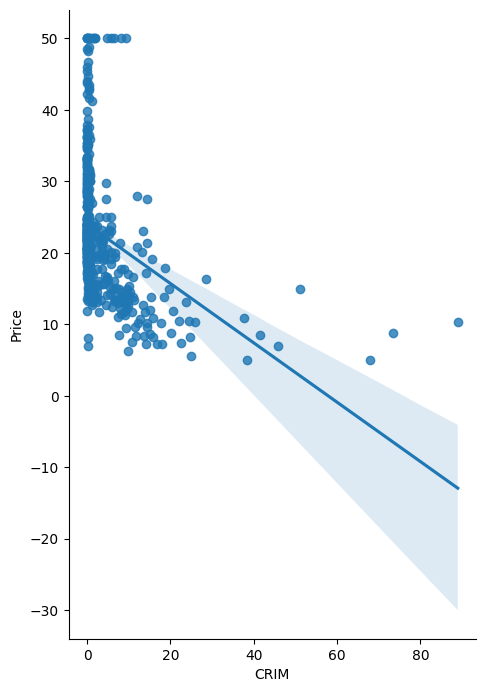

In [76]:
#scatter plot between cime and price
sns.pairplot(dataset,x_vars=['CRIM'],y_vars='Price',size=7,aspect=0.7,kind='reg')

<Axes: xlabel='RM', ylabel='Price'>

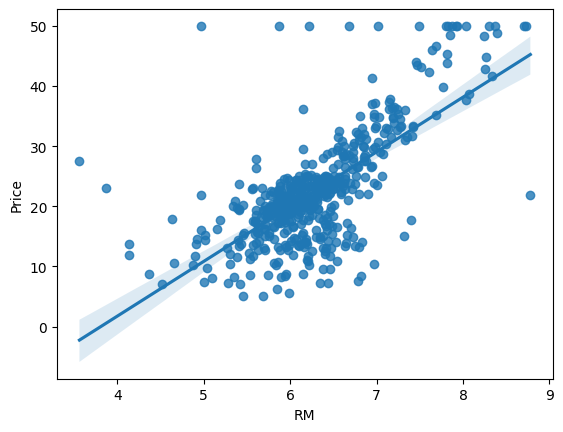

In [77]:
# regression plot between RM and Price
sns.regplot(x='RM',y='Price',data=dataset)

<Axes: xlabel='CHAS', ylabel='Price'>

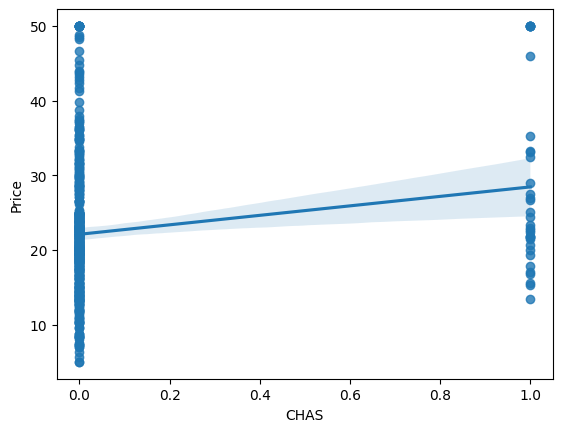

In [78]:
# regression plot between RM and Price
sns.regplot(x='CHAS',y='Price',data=dataset)

# Preparing Dataset For Model Training

In [79]:
# Preparing Dataset For Model Training
# split the dataset into train and test
from sklearn.model_selection import train_test_split
X = dataset.drop('Price',axis=1)
y = dataset['Price']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [80]:
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21
116,0.13158,0.0,10.01,0,0.547,6.176,72.5,2.7301,6,432.0,17.8,393.30,12.04
45,0.17142,0.0,6.91,0,0.448,5.682,33.8,5.1004,3,233.0,17.9,396.90,10.21
16,1.05393,0.0,8.14,0,0.538,5.935,29.3,4.4986,4,307.0,21.0,386.85,6.58
468,15.57570,0.0,18.10,0,0.580,5.926,71.0,2.9084,24,666.0,20.2,368.74,18.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.17120,0.0,8.56,0,0.520,5.836,91.9,2.2110,5,384.0,20.9,395.67,18.66
270,0.29916,20.0,6.96,0,0.464,5.856,42.1,4.4290,3,223.0,18.6,388.65,13.00
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280.0,17.0,390.94,5.99
435,11.16040,0.0,18.10,0,0.740,6.629,94.6,2.1247,24,666.0,20.2,109.85,23.27


In [81]:
# standardize the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_train

# what is the importance of scaling the dataset?
# scaling the dataset is important because it helps to normalize the dataset
# and helps to avoid the problem of overfitting and underfitting
# scaling the dataset helps to improve the accuracy of the model
# scaling helps convergence of the model via gradient descent algorithm and helps to speed up the training process

array([[-0.41425879, -0.50512499, -1.29214218, ...,  0.18727079,
         0.39651419, -1.01531611],
       [-0.40200818, -0.50512499, -0.16208345, ..., -0.21208981,
         0.3870674 , -0.05366252],
       [-0.39721053, -0.50512499, -0.60948856, ..., -0.16771641,
         0.42854113, -0.31132373],
       ...,
       [-0.41604586,  3.03838247, -1.3166773 , ..., -0.56707702,
         0.35987906, -0.90549329],
       [ 0.92611293, -0.50512499,  1.00549958, ...,  0.8528718 ,
        -2.87841346,  1.52750437],
       [-0.39030549, -0.50512499, -0.37135358, ...,  1.16348561,
        -3.32828832, -0.25218837]])

In [82]:
X_test = scaler.transform(X_test)
X_test

array([[-0.406801  , -0.50512499, -1.02225586, ..., -0.74457062,
         0.41241246, -0.47605794],
       [-0.41105674,  1.26662874, -0.68165068, ..., -0.30083661,
         0.42854113, -1.25185755],
       [-0.4051199 , -0.50512499,  2.39678516, ...,  0.8084984 ,
         0.35031705,  0.79535229],
       ...,
       [-0.35439903, -0.50512499, -0.71195877, ..., -0.38958342,
         0.25688594, -1.09697922],
       [ 0.25423453, -0.50512499,  1.00549958, ...,  0.8528718 ,
        -2.98970133,  0.53487511],
       [ 0.77732457, -0.50512499,  1.00549958, ...,  0.8528718 ,
         0.33199949,  0.56585078]])

In [ ]:
import pickle
pickle.dump(scaler,open('scaling.pkl','wb'))

# Training The Model

In [94]:
# Linear Regression Model
from sklearn.linear_model import LinearRegression
regresison = LinearRegression()
regresison.fit(X_train,y_train)

LinearRegression()

In [95]:
# Model Evaluation
# print the intercept
print(regresison.intercept_)

23.01581920903955


In [96]:
# print the coefficients
print(regresison.coef_)


[-1.10834602  0.80843998  0.34313466  0.81386426 -1.79804295  2.913858
 -0.29893918 -2.94251148  2.09419303 -1.44706731 -2.05232232  1.02375187
 -3.88579002]


In [97]:
# pair the feature names with the coefficients with decreasing order of importance
coeff_df = pd.DataFrame(regresison.coef_,X.columns,columns=['Coefficient'])
coeff_df.sort_values(by='Coefficient',ascending=True)
coeff_df


,Coefficient
CRIM,-1.108346
ZN,0.808440
INDUS,0.343135
CHAS,0.813864
NOX,-1.798043
RM,2.913858
AGE,-0.298939
DIS,-2.942511
RAD,2.094193
TAX,-1.447067


In [99]:
# on which parameters the model has been trained on?
regresison.get_params()


{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [102]:
# predict the test set results
reg_pred = regresison.predict(X_test)

# compare the actual output values for X_test with the predicted values
df = pd.DataFrame({'Actual':y_test,'Predicted':reg_pred})
df

,Actual,Predicted
173,23.6,28.648960
274,32.4,36.495014
491,13.6,15.411193
72,22.8,25.403213
452,16.1,18.855280
...,...,...
441,17.1,17.403672
23,14.5,13.385941
225,50.0,39.983425
433,14.3,16.682863


<Axes: xlabel='Actual', ylabel='Predicted'>

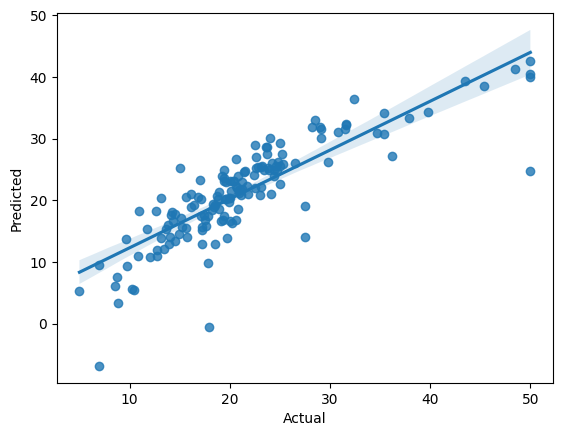

In [105]:
# plot a regression plot between the actual and predicted values
sns.regplot(x='Actual',y='Predicted',data=df)

/var/folders/_n/wqs6gy2s2z95mhp37pm6p79w0000gn/T/ipykernel_87345/1268043026.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals)


<Axes: xlabel='Price', ylabel='Density'>

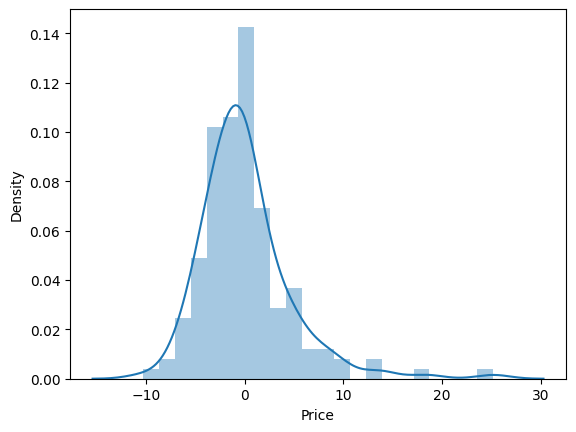

In [111]:
# calculate residuals and plot a histogram of it
residuals = y_test - reg_pred
sns.distplot(residuals)

# Assumptions

<Axes: ylabel='Price'>

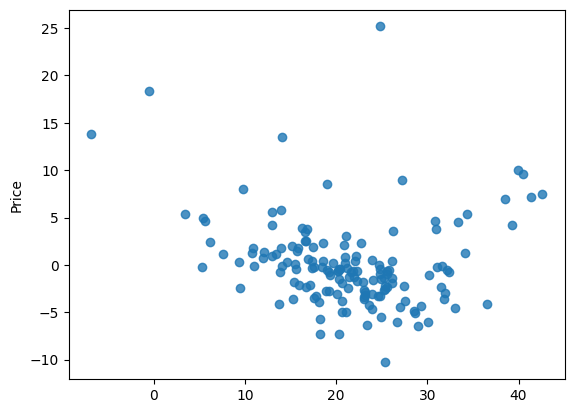

In [112]:
# print scatter and regplot with respect to prediction and residuals
sns.regplot(x=reg_pred,y=residuals,scatter=True,fit_reg=False)


In [116]:
# evaluate the performance of the algorithm via MSE, RMSE and R2-score, MAE, MAPE
from sklearn import metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,reg_pred))
print('Mean Squared Error:',metrics.mean_squared_error(y_test,reg_pred))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test,reg_pred)))
print('R2-score:',metrics.r2_score(y_test,reg_pred))
#MAPE
print('Mean Absolute Percentage Error:', np.mean(np.abs((y_test - reg_pred) / y_test)) * 100)
#adjusted R2
print('Adjusted R2:',1-(1-metrics.r2_score(y_test,reg_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

print("lower the MAE, MSE, RMSE and MAPE better the model performance")
print("higher the R2-score and adjusted R2-score better the model performance")


Mean Absolute Error: 3.1627098714574053
Mean Squared Error: 21.51744423117721
Root Mean Squared Error: 4.6386899261728205
R2-score: 0.7112260057484932
Mean Absolute Percentage Error: 16.521221680468287
Adjusted R2: 0.6840226584639308
lower the MAE, MSE, RMSE and MAPE better the model performance
higher the R2-score and adjusted R2-score better the model performance


# New Data Prediction

In [137]:
# New data prediction

# just print the values of all the features as key, value pairs
new_data = {'CRIM':0.00632,'ZN':18.0,'INDUS':2.31,'CHAS':0.0,'NOX':0.538,'RM':6.575,'AGE':65.2,'DIS':4.09,'RAD':1.0,'TAX':296.0,'PTRATIO':15.3,'B':396.9,'LSTAT':4.98}
new_data_WITHOUT_scalar_transformation = pd.DataFrame(new_data,index=[0])
new_data_WITHOUT_scalar_transformation

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.09,1.0,296.0,15.3,396.9,4.98


In [138]:
# predict the price of a house with new_data
new_pred_WITHOUT_scalar_transformation = regresison.predict(new_data_WITHOUT_scalar_transformation)
print("new_pred_WITHOUT_scalar_transformation = ", new_pred_WITHOUT_scalar_transformation)

new_pred_WITHOUT_scalar_transformation =  [-45.64344024]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [140]:
# standardize the new data
new_data_WITH_scalar_transformation = scaler.transform(new_data_WITHOUT_scalar_transformation)
new_data_WITH_scalar_transformation

array([[-0.41709233,  0.29216419, -1.27338003, -0.28154625, -0.16513629,
         0.34715902, -0.13030059,  0.15267164, -0.97798895, -0.66777595,
        -1.32142483,  0.42854113, -1.04769976]])

In [141]:
# predict the price of a house with new_data
new_pred_WITH_scalar_transformation = regresison.predict(new_data_WITH_scalar_transformation)
print("new_pred_WITH_scalar_transformation = ", new_pred_WITH_scalar_transformation)

new_pred_WITH_scalar_transformation =  [30.08649576]


# PICKLE - the model file for Deployment

In [142]:
# # PICKLE - the model file for Deployment
import pickle


In [143]:
pickle.dump(regresison,open('regmodel.pkl','wb'))
# "wb" - write binary model file in the current working directory

In [144]:
# load the model file
pickled_model = pickle.load(open('regmodel.pkl','rb'))
# "rb" - read binary model file in the current working directory

In [147]:
#predict the price of a house with new_data from pickled model
pickled_prediction_WITH_scalar_transformation = pickled_model.predict(scaler.transform(new_data_WITHOUT_scalar_transformation))
print("pickled_prediction_WITH_scalar_transformation = ", pickled_prediction_WITH_scalar_transformation)


pickled_prediction_WITH_scalar_transformation =  [30.08649576]


In [148]:
# rename "pickled_prediction_WITH_scalar_transformation" to "pickled_model"
pickled_model = pickled_prediction_WITH_scalar_transformation
